In [188]:
include("../optimizers/linesearch.jl")
include("../utils/functions.jl")
using Gadfly

# Line Search algorithms

Now implement general line search algorithm of the form:

$$x_{k+1} = x_k + \alpha p_k,$$

where $\alpha$ is the step size and $p_k$ is the direction.

## Steepest descent

Here we just step in the direction of the gradient $p_k = -\nabla f(x_k)$.

## Newton's method

Here the step is $p_k = -\nabla^2 f(x_k)^{-1} \nabla f(x_k).$

If the Hessian $\nabla^2 f(x_k)^{-1}$ is not positive definite, we make a correction by adding a small multiple of the identity to the diagonal, trying small values until we get something sufficiently positive definite.

## Quasi-Newton methods

## Inexact Newton methods and conjugate gradient

# Testing the optimization methods 

## Fenton's function

In [189]:
xvals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "newton", 1000);
svals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "steepest", 1000);
cvals = line_search(fenton, [3.;4.], fenton_g, fenton_h, "newton_CG", 1000);

Using method newton
Number of indefinite fixes 0
Number of iterations 7
Using method steepest
100
200
300
Number of indefinite fixes 0
Number of iterations 376
Using method newton_CG
Number of indefinite fixes 0
Number of iterations 10


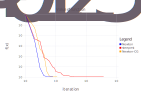

In [194]:
nsamps = length(xvals)
nsamps2 = length(svals)
nsamps3 = length(cvals)


fx = [fenton(xvals[i]) for i in 1:nsamps]
fx2 = [fenton(svals[i]) for i in 1:nsamps2]
fx3 = [fenton(cvals[i]) for i in 1:nsamps3]


Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=fx3, Geom.line, Theme(default_color=color("orange"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
Scale.x_log10, Scale.y_log10)

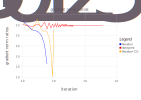

In [204]:
nsamps = length(xvals)

grads = [norm(fenton_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(fenton_g(svals[i]), 2) for i in 1:nsamps2]
grads3 = [norm(fenton_g(cvals[i]), 2) for i in 1:nsamps3]


Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3-1, y=grads3[2:nsamps3,:]./grads3[1:nsamps3-1,:], Geom.line, Theme(default_color=color("orange"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
Scale.x_log10, Scale.y_log10)

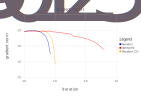

In [209]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=grads3, Geom.line, Theme(default_color=color("orange"))),
    Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
    Scale.x_log10, Scale.y_log10)

## Rosenbrock function

The Rosenbrock function is defined by:
$$f(x) = \sum_{i=1}^n [ (1-x_{2i-1})^2 + 10(x_{2i} - x_{2i-1}^2)^2 ]$$


In [212]:
xvals = line_search(rosenbrock, ones(100)*2, rosenbrock_g, rosenbrock_h, "newton", 2000);
svals = line_search(rosenbrock, ones(100)*2, rosenbrock_g, rosenbrock_h, "steepest", 2000);
cvals = line_search(rosenbrock, ones(100)*2, rosenbrock_g, rosenbrock_h, "newton_CG", 2000);

Using method newton
Number of indefinite fixes 0
Number of iterations 9
Using method steepest
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
Number of indefinite fixes 0
Number of iterations 1675
Using method newton_CG
Number of indefinite fixes 0
Number of iterations 10


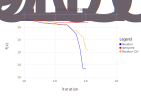

In [213]:
func = rosenbrock
func_g = rosenbrock_g

nsamps = length(xvals)
nsamps2 = length(svals)
nsamps2 = length(cvals)


fx = [func(xvals[i]) for i in 1:nsamps]
fx2 = [func(svals[i]) for i in 1:nsamps2]
fx3 = [func(cvals[i]) for i in 1:nsamps3]


Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=fx3, Geom.line, Theme(default_color=color("orange"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
Scale.x_log10, Scale.y_log10)

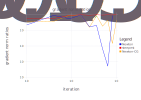

In [216]:
nsamps = length(xvals)

grads = [norm(func(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(func(svals[i]), 2) for i in 1:nsamps2]
grads3 = [norm(func(cvals[i]), 2) for i in 1:nsamps3]


Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3-1, y=grads3[2:nsamps3,:]./grads3[1:nsamps3-1,:], Geom.line, Theme(default_color=color("orange"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
Scale.x_log10, Scale.y_log10)

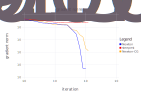

In [217]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=grads3, Geom.line, Theme(default_color=color("orange"))),
    Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
    Scale.x_log10, Scale.y_log10)

## Cute function

The cute function is given by $f: \mathbb{R}^n \rightarrow \mathbb{R}$
$$ f(x) = \sum_{i=1}^{n-4} (-4x_i+3)^2 + (x_i^2 + 2x_{i+1}^2 + 3x_{i+2}^2 + 4 x_{i+3}^2 + 5x_n^2)^2 $$

In [219]:
xvals = line_search(cute, ones(100)*10, cute_g, cute_h, "newton", 2000);
svals = line_search(cute, ones(100)*10, cute_g, cute_h, "steepest", 2000);
cvals = line_search(cute, ones(100)*10, cute_g, cute_h, "newton_CG", 2000);

Using method newton
Number of indefinite fixes 15
Number of iterations 15
Using method steepest
Number of indefinite fixes 0
Number of iterations 94
Using method newton_CG
Number of indefinite fixes 14
Number of iterations 14


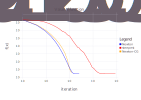

In [220]:
func = cute
func_g = cute_g

nsamps = length(xvals)
nsamps2 = length(svals)

fx = [func(xvals[i]) for i in 1:nsamps]
fx2 = [func(svals[i]) for i in 1:nsamps2]
fx3 = [func(cvals[i]) for i in 1:nsamps3]


Gadfly.plot(layer(x=1:nsamps, y=fx, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=fx2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=fx3, Geom.line, Theme(default_color=color("orange"))),
Guide.xlabel("iteration"), Guide.ylabel("f(x)"), Guide.title("Value of function"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
Scale.x_log10, Scale.y_log10)

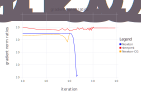

In [221]:
grads = [norm(func_g(xvals[i]), 2) for i in 1:nsamps]
grads2 = [norm(func_g(svals[i]), 2) for i in 1:nsamps2]
grads3 = [norm(func(cvals[i]), 2) for i in 1:nsamps3]


Gadfly.plot(
layer(x=1:nsamps-1, y=grads[2:nsamps,:]./grads[1:nsamps-1,:], Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2-1, y=grads2[2:nsamps2,:]./grads2[1:nsamps2-1,:], Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3-1, y=grads3[2:nsamps3,:]./grads3[1:nsamps3-1,:], Geom.line, Theme(default_color=color("orange"))),
Guide.xlabel("iteration"), Guide.ylabel("gradient norm ratios"), Guide.title("gradient norm ratios"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
Scale.x_log10, Scale.y_log10)

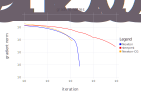

In [222]:
Gadfly.plot(layer(x=1:nsamps, y=grads, Geom.line, Theme(default_color=color("blue"))),
layer(x=1:nsamps2, y=grads2, Geom.line, Theme(default_color=color("red"))),
layer(x=1:nsamps3, y=grads3, Geom.line, Theme(default_color=color("orange"))),
    Guide.xlabel("iteration"), Guide.ylabel("gradient norm"), Guide.title("gradient norms"),
Guide.manual_color_key("Legend", ["Newton", "steepest", "Newton-CG"], ["blue", "red", "orange"]),
    Scale.x_log10, Scale.y_log10)